#  <span style="color:blue">Evaluating Regression Models 

First things first, wrote the setting

In [47]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle
import env
import statsmodels.api as sm

## <span style="color:blue">1.Load your zillow dataset.

### ACQUIRE

In [2]:
#now we have the makings of a character from real life and now we need to  adjust him to our story
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [3]:
#let's modify a couple of things to make his strong points stand out most
df = wrangle.wrangled_zillow(df)

In [4]:
#We always train on train data
#Let's bring it in
train, validate, test = wrangle.traintestsplit(df)

Fit a linear regression model (ordinary least squares) and compute yhat, 

(predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.)

Here is some sample code to get you started:

## <span style="color:blue">2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [5]:
y=train[["taxvaluedollarcnt"]] #what we want
x=train[["calculatedfinishedsquarefeet"]] #how we measure
# I had flipped the values and added double brackets

In [18]:
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']

X_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']

X_test = test[['calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']

In [20]:
X_train.head()

,calculatedfinishedsquarefeet
1667396,2281.0
250527,1691.0
1334166,1677.0
195429,1627.0
49854,1146.0


In [21]:
y_train

1667396     398552.0
250527      108264.0
1334166     135962.0
195429      101427.0
49854        37576.0
             ...    
1029661      92933.0
482782     1242641.0
184352      259952.0
760959      778720.0
2073820     226995.0
Name: taxvaluedollarcnt, Length: 1170051, dtype: float64

Need to turn these into one dimensional arrays

In [15]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(x, y)
predictions = model.predict(x)

## <span style="color:blue">Plot linear regression models

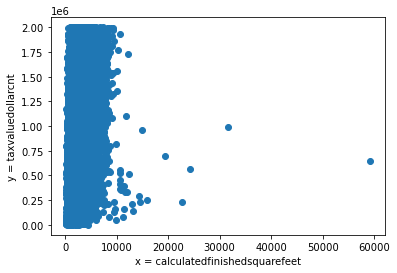

In [16]:
# look at scatter of x vs y
plt.scatter(x, y)
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = taxvaluedollarcnt');

Scatterplot shows outliers houses of 20k calculated finished square feet

In [10]:
baseline = y.mean()
baseline

taxvaluedollarcnt    399083.816953
dtype: float64

In [11]:
train['baseline'] = y.mean()
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline
1667396,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0,261.0,NaN
250527,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0,261.0,NaN
1334166,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0,261.0,NaN
195429,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0,261.0,NaN
49854,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0,261.0,NaN


In [22]:
baseline = train.taxvaluedollarcnt.mean()
baseline

399083.8169532781

In [23]:
train['baseline'] = train.taxvaluedollarcnt.mean()
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline
1667396,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0,261.0,399083.816953
250527,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0,261.0,399083.816953
1334166,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0,261.0,399083.816953
195429,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0,261.0,399083.816953
49854,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0,261.0,399083.816953


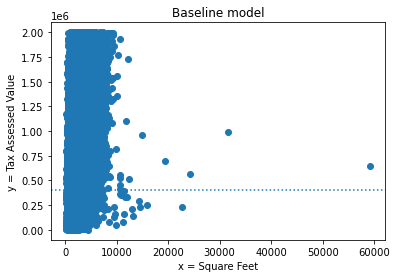

In [24]:
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.axhline(train.taxvaluedollarcnt.mean(), ls = ':')
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('Baseline model');

In [1]:
Scatterplot shows outliers houses of 20k square feet

SyntaxError: invalid decimal literal (3490432758.py, line 1)

In [25]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [26]:
train['yhat'] = predictions

In [27]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline,yhat
1667396,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0,261.0,399083.816953,511262.589142
250527,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0,261.0,399083.816953,374110.022383
1334166,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0,261.0,399083.816953,370855.554697
195429,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0,261.0,399083.816953,359232.455820
49854,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0,261.0,399083.816953,247418.244615


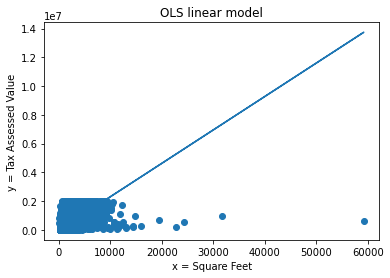

In [28]:
# visualize the line of best fit from OLS linear model
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.plot(train.calculatedfinishedsquarefeet, train.yhat)
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('OLS linear model');

## <span style="color:blue">3. Plot the residuals for the linear regression model that you made.

In [29]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline,yhat
1667396,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0,261.0,399083.816953,511262.589142
250527,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0,261.0,399083.816953,374110.022383
1334166,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0,261.0,399083.816953,370855.554697
195429,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0,261.0,399083.816953,359232.455820
49854,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0,261.0,399083.816953,247418.244615


In [30]:
# residual = actual - predicted
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline

In [31]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline,yhat,residual,baseline_residual
1667396,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0,261.0,399083.816953,511262.589142,-112710.589142,-531.816953
250527,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0,261.0,399083.816953,374110.022383,-265846.022383,-290819.816953
1334166,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0,261.0,399083.816953,370855.554697,-234893.554697,-263121.816953
195429,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0,261.0,399083.816953,359232.455820,-257805.455820,-297656.816953
49854,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0,261.0,399083.816953,247418.244615,-209842.244615,-361507.816953


Negative Residual = Prediction  high the actual observed value is lower than the predicted value. In other words, the prediction is higher than the actual value. This indicates that the model has overestimated the target variable.
<br>
Positive Residual = Prediction too low

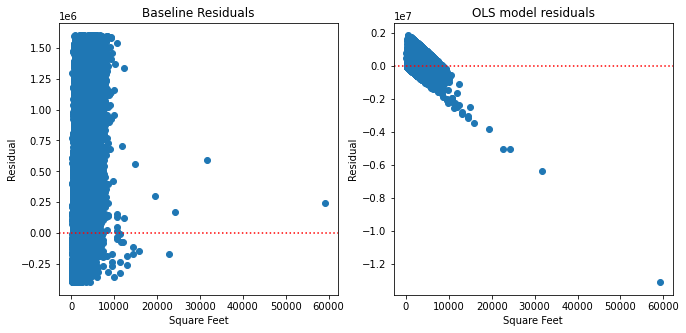

In [32]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [33]:
baseline_residual_min = train.baseline_residual.min()
baseline_residual_max = train.baseline_residual.max()
residual_min = train.residual.min()
residual_max = train.residual.max()

In [34]:
residual_min, residual_max

(-13102372.129236577, 1872908.995131049)

Negative Residual = Prediction too high
Positive Residual = Prediction too low


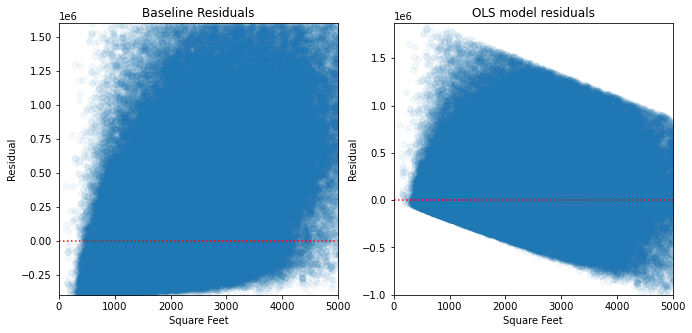

In [35]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual, alpha=.05)
plt.axhline(y = 0, ls = ':', color = 'red')
plt.xlim(0,5000)
plt.ylim(baseline_residual_min, baseline_residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual, alpha=0.05)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlim(0,5000)
plt.ylim(-1_000_000, residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals')
print("Negative Residual = Prediction too high")
print("Positive Residual = Prediction too low")

### FINDINGS
- Presence of a slope in the residual plot implies the necessity of incorporating additional predictors into the model.

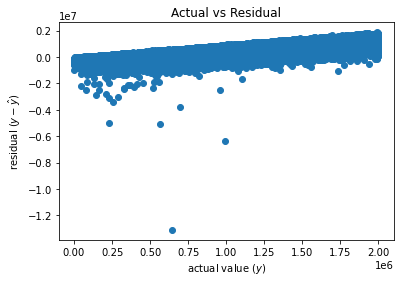

In [36]:
# Residual plot (y vs residual)
actual = train.taxvaluedollarcnt
predicted = train.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()

## <span style="color:blue">4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## <span style="color:blue">5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [37]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1667396,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0,261.0,399083.816953,511262.589142,-112710.589142,-531.816953,1.270368e+10,2.828293e+05
250527,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0,261.0,399083.816953,374110.022383,-265846.022383,-290819.816953,7.067411e+10,8.457617e+10
1334166,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0,261.0,399083.816953,370855.554697,-234893.554697,-263121.816953,5.517498e+10,6.923309e+10
195429,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0,261.0,399083.816953,359232.455820,-257805.455820,-297656.816953,6.646365e+10,8.859958e+10
49854,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0,261.0,399083.816953,247418.244615,-209842.244615,-361507.816953,4.403377e+10,1.306879e+11


<b>
    Calculating SSE
</b>

In [38]:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 75650414104341584.0
SSE Baseline = 114830824205326000.0


In [39]:
SSE < SSE_baseline

True

<b>
    
Calculating MSE

</b>

In [40]:
len(train)
train.shape[0]

1170051

In [41]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  64655655270.0
MSE baseline =  98141725621.6


<b>
    
Calculating RMSE

</b>

In [42]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  254274.8
RMSE baseline =  313275.8


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [43]:
if SSE < SSE_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
    print('OLS Regression Model Performs Worse than Baseline')

OLS Regression Model Performs Better than Baseline


## 7. What is the amount of variance explained in your model?

In [44]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline = train['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = train['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.34120115719910665

In [45]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(train.taxvaluedollarcnt, train.yhat)

0.3412011571991066

## Is your model better than the baseline model?

In [48]:
X2 = sm.add_constant(train.calculatedfinishedsquarefeet)
est = sm.OLS(train.taxvaluedollarcnt, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 6.060e+05
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:05:24   Log-Likelihood:            -1.6223e+07
No. Observations:             1170051   AIC:                         3.245e+07
Df Residuals:                 1170049   BIC:                         3.245e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- OLS Regression Model outperformed baseline model on test using RMSE as evaluation metric
- - OLS Regression Model RMSE: 272306.6
- - Baseline Regression Model: 313748.0

However, overall the OLS Regression Model does a poor job of evaluating home price. The dollar amount of error would be unacceptable to any buyer/seller.

## 9. Create a file named evaluate.py that contains the following functions.

In [49]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [50]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [51]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline